In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
from scipy import stats as scipy_stats  # Rename to avoid conflict

In [ ]:
def load_all_results(base_dir="results_30seeds"):
    """Load results from all seeds"""
    results = []
    base_dir = Path(base_dir)
    
    for seed_dir in sorted(base_dir.glob("seed_*")):
        with open(seed_dir / 'results.pkl', 'rb') as f:
            results.append(pickle.load(f))
    
    return results

def analyze_training_metrics(results):
    """Analyze training metrics across all seeds"""
    # Extract metrics
    wasserstein = np.array([r['metrics']['wasserstein'] for r in results])
    kl_div = np.array([r['metrics']['kl_div'] for r in results])
    disc_acc = np.array([r['metrics']['disc_acc'] for r in results])
    
    # Calculate statistics
    metrics_stats = {
        'wasserstein': {
            'mean': np.mean(wasserstein, axis=0),
            'std': np.std(wasserstein, axis=0),
            'ci_95': scipy_stats.t.interval(0.95, len(wasserstein)-1, 
                                    loc=np.mean(wasserstein, axis=0),
                                    scale=scipy_stats.sem(wasserstein, axis=0))
        },
        'kl_div': {
            'mean': np.mean(kl_div, axis=0),
            'std': np.std(kl_div, axis=0),
            'ci_95': scipy_stats.t.interval(0.95, len(kl_div)-1,
                                    loc=np.mean(kl_div, axis=0),
                                    scale=scipy_stats.sem(kl_div, axis=0))
        },
        'disc_acc': {
            'mean': np.mean(disc_acc, axis=0),
            'std': np.std(disc_acc, axis=0),
            'ci_95': scipy_stats.t.interval(0.95, len(disc_acc)-1,
                                    loc=np.mean(disc_acc, axis=0),
                                    scale=scipy_stats.sem(disc_acc, axis=0))
        }
    }
    
    return metrics_stats

def plot_training_curves(stats):
    """Plot training curves with confidence intervals"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # Wasserstein Distance
    mean = stats['wasserstein']['mean']
    ci_low, ci_high = stats['wasserstein']['ci_95']
    steps = range(len(mean))
    
    ax1.plot(mean, label='Mean', color='blue')
    ax1.fill_between(steps, ci_low, ci_high, alpha=0.2, color='blue')
    ax1.set_title('Wasserstein Distance')
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Distance')
    
    # KL Divergence
    mean = stats['kl_div']['mean']
    ci_low, ci_high = stats['kl_div']['ci_95']
    
    ax2.plot(mean, label='Mean', color='green')
    ax2.fill_between(steps, ci_low, ci_high, alpha=0.2, color='green')
    ax2.set_title('KL Divergence')
    ax2.set_xlabel('Steps')
    ax2.set_ylabel('KL Div')
    
    # Discriminator Accuracy
    mean = stats['disc_acc']['mean']
    ci_low, ci_high = stats['disc_acc']['ci_95']
    
    ax3.plot(mean, label='Mean', color='red')
    ax3.fill_between(steps, ci_low, ci_high, alpha=0.2, color='red')
    ax3.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
    ax3.set_title('Discriminator Accuracy')
    ax3.set_xlabel('Steps')
    ax3.set_ylabel('Accuracy')
    
    plt.tight_layout()
    plt.show()

def plot_final_distributions(results):
    """Plot distribution of final performances"""
    final_metrics = {
        'wasserstein': [r['metrics']['wasserstein'][-1] for r in results],
        'kl_div': [r['metrics']['kl_div'][-1] for r in results],
        'disc_acc': [r['metrics']['disc_acc'][-1] for r in results]
    }
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # Wasserstein Distribution
    sns.histplot(final_metrics['wasserstein'], ax=ax1, kde=True)
    ax1.set_title('Final Wasserstein Distance Distribution')
    ax1.axvline(np.mean(final_metrics['wasserstein']), color='r', linestyle='--')
    
    # KL Distribution
    sns.histplot(final_metrics['kl_div'], ax=ax2, kde=True)
    ax2.set_title('Final KL Divergence Distribution')
    ax2.axvline(np.mean(final_metrics['kl_div']), color='r', linestyle='--')
    
    # Discriminator Accuracy Distribution
    sns.histplot(final_metrics['disc_acc'], ax=ax3, kde=True)
    ax3.set_title('Final Discriminator Accuracy Distribution')
    ax3.axvline(np.mean(final_metrics['disc_acc']), color='r', linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    return final_metrics

def print_statistical_summary(final_metrics):
    """Print statistical summary of final performances"""
    for metric_name, values in final_metrics.items():
        print(f"\n{metric_name} Statistics:")
        print(f"Mean: {np.mean(values):.4f}")
        print(f"Std: {np.std(values):.4f}")
        print(f"95% CI: [{np.percentile(values, 2.5):.4f}, {np.percentile(values, 97.5):.4f}]")
        print(f"Min: {np.min(values):.4f}")
        print(f"Max: {np.max(values):.4f}")

def main():

    # Load all results
    results = load_all_results()
    
    # Analyze training curves
    stats = analyze_training_metrics(results)
    
    # Plot training curves
    plot_training_curves(stats)
    
    # Analyze final distributions
    final_metrics = plot_final_distributions(results)
    
    # Print statistical summary
    print_statistical_summary(final_metrics)


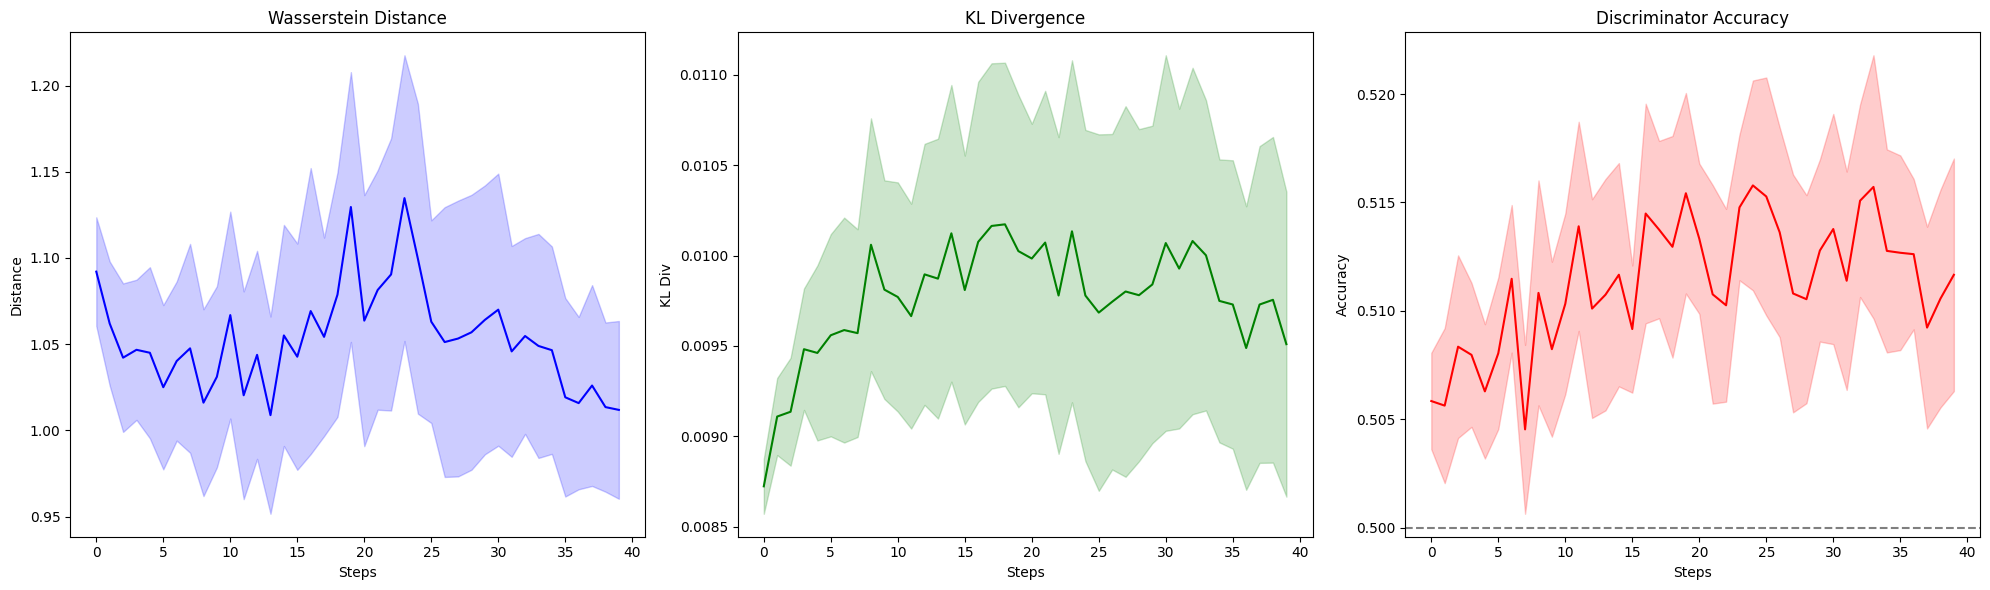

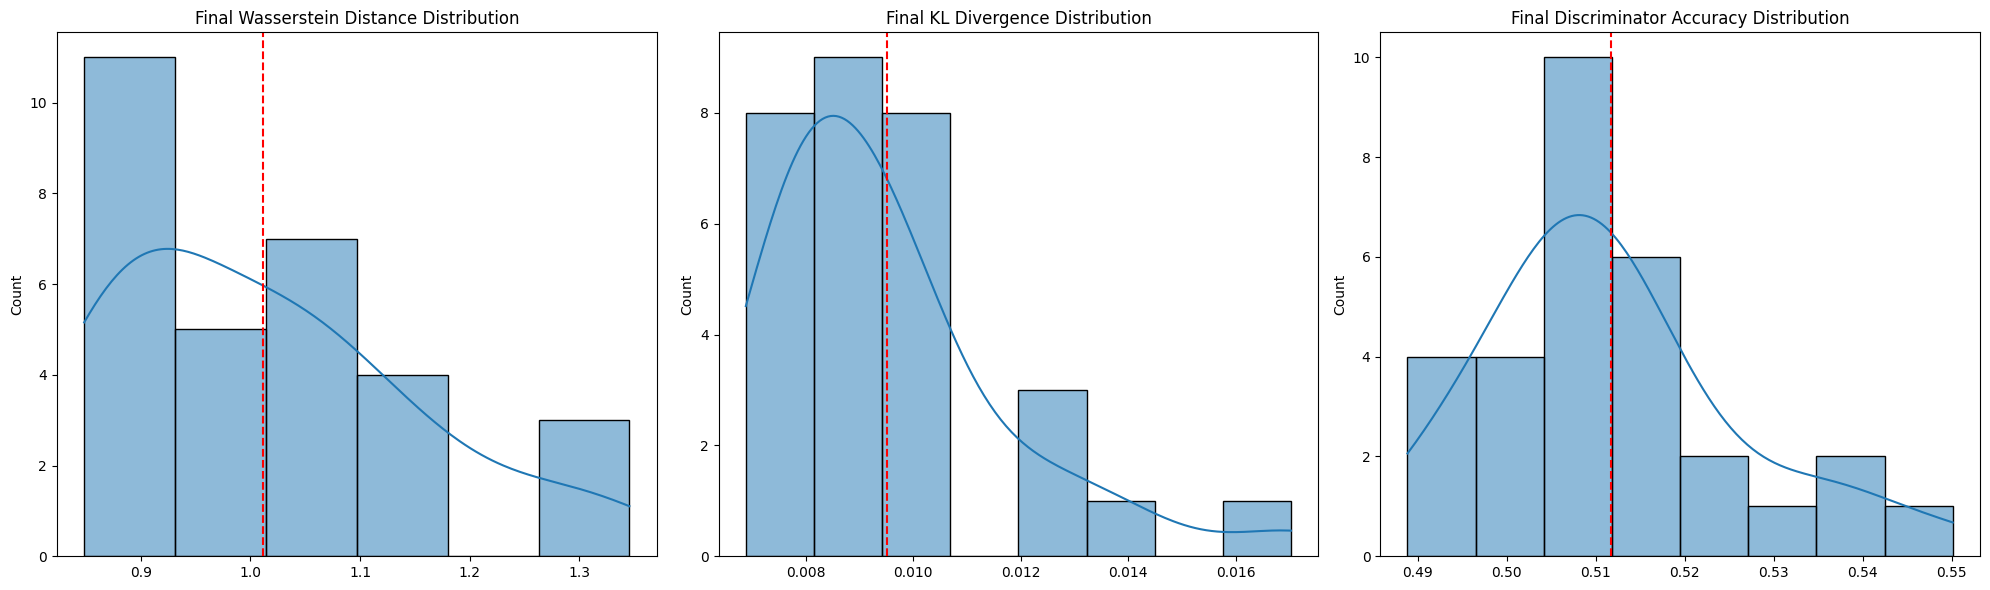


wasserstein Statistics:
Mean: 1.0119
Std: 0.1357
95% CI: [0.8505, 1.3055]
Min: 0.8483
Max: 1.3458

kl_div Statistics:
Mean: 0.0095
Std: 0.0022
95% CI: [0.0072, 0.0149]
Min: 0.0069
Max: 0.0170

disc_acc Statistics:
Mean: 0.5117
Std: 0.0141
95% CI: [0.4899, 0.5428]
Min: 0.4889
Max: 0.5501


In [ ]:
if __name__ == "__main__":
    main()

In [8]:
results_30seeds/seed_1001/

SyntaxError: invalid syntax (3495674437.py, line 1)

In [9]:
results

NameError: name 'results' is not defined